In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hypnn.hypergraph import Hyperedge, Hypergraph, Vertex
from hypnn.gui.mpldraw import MplHypergraph

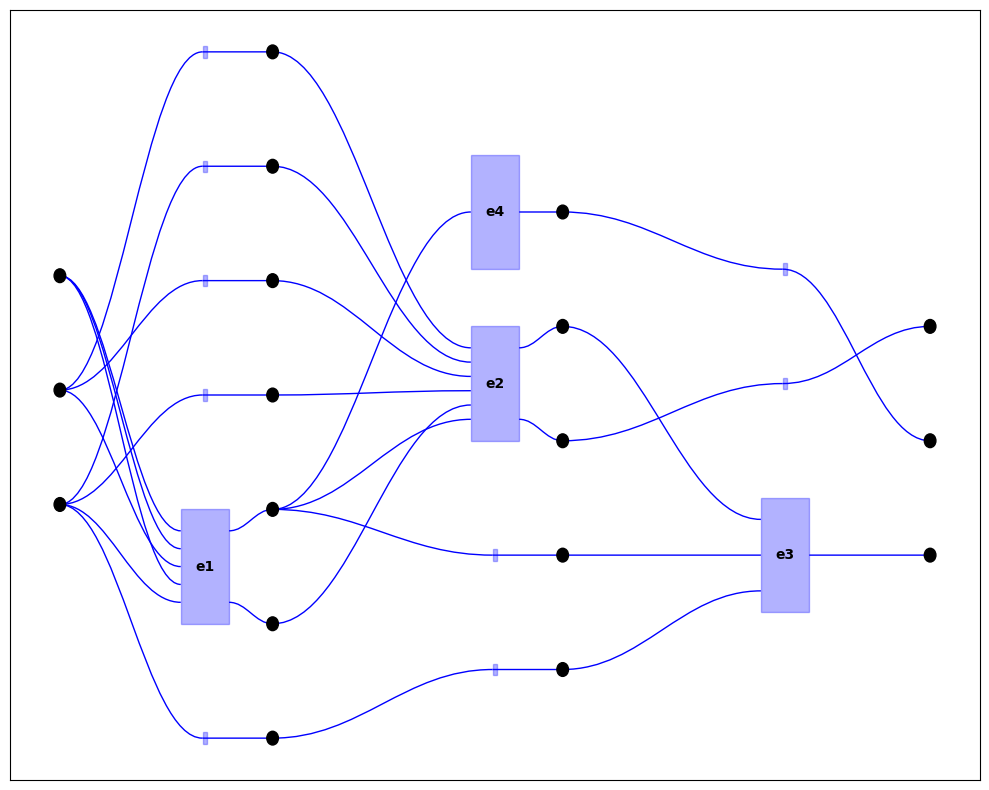

In [3]:
g = Hypergraph()
x, y, z, w, v, p, q, r, o = tuple(g.add_vertex(Vertex()) for _ in range(9))
e1 = g.add_edge(Hyperedge([x, x, y, x, z], [w, v], 'e1'))
e2 = g.add_edge(Hyperedge([y, z, y, z, v, w], [p, q], 'e2'))
e3 = g.add_edge(Hyperedge([p, w, z], [o], 'e3'))
e4 = g.add_edge(Hyperedge([w], [r], 'e4'))

g.inputs = [x, y, z]
g.outputs = [q, r, o]

g_mpl = MplHypergraph(g)
g_mpl.draw()